# Predicting Breast Cancer Malignancy

### Goal: Build Convolution Neural Network(CNN) to classify if breast tissue is malignant based on patient biopsy slides. 

# Requirements 

### Datasets:
Kaggle Data Set: BreaKHis 400x
URL: https://www.kaggle.com/datasets/forderation/breakhis-400x

### Python:
Python3 (3.11.5)

### Modules:
TensorFlow (2.14.0)

Numpy (1.26.1)

Matplotlib (3.8.0)

Scikit Learn (1.3.2)

# Convolutional Neural Network

### Importing the libraries

In [10]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
from platform import python_version
print(python_version())
print (tf.__version__)

3.11.5
2.14.0


## Part 1 - Loading The Dataset

## Part 2 - Loading The Dataset

In [12]:
dataset_path = 'P:/Portfolio Sets/CNN Breast Tumors/BreaKHis 400X/train' 

### Training Set

In [13]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode='rgb',
    image_size = (64, 64),
    batch_size = 32,
    shuffle = True,
    seed = 100,
    validation_split = 0.2,
    subset = 'training')

Found 1148 files belonging to 2 classes.
Using 919 files for training.


### Validation Set

In [14]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path, 
    labels = 'inferred',
    label_mode ='categorical',
    color_mode='rgb',
    image_size = (64, 64),
    batch_size = 32,
    shuffle = True,
    seed = 100,
    validation_split = 0.2,
    subset = 'validation')

Found 1148 files belonging to 2 classes.
Using 229 files for validation.


### Test Set

In [15]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'P:/Portfolio Sets/CNN Breast Tumors/BreaKHis 400X/test',
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode='rgb',
    image_size = (64, 64),
    batch_size = 20,
    shuffle = False,
    validation_split = None,
    subset = None)

Found 547 files belonging to 2 classes.


In [16]:
#Check TensorSpec and Class Labels
print(train_dataset.element_spec)
print("+++++++++++++++++++++++++++++")
print(train_dataset.class_names)

(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))
+++++++++++++++++++++++++++++
['benign', 'malignant']


## Part 2 - Preprocessing/Augmentation 

In [17]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation

### Rescaling Validation and Test DataSet

In [18]:
Rescale = tf.keras.Sequential([Rescaling(1.0 / 255)])

validation_dataset = validation_dataset.map(lambda x, y: (Rescale(x, training = False), y))
test_dataset = test_dataset.map(lambda x, y: (Rescale(x, training = False), y))

### Augmentation

In [19]:
Augmentation = tf.keras.models.Sequential([   
    Rescaling(1.0 / 255),
    RandomFlip("horizontal"),
    RandomRotation(factor=0.2)
])

train_dataset = train_dataset.map(lambda x, y: (Augmentation(x, training = True), y))

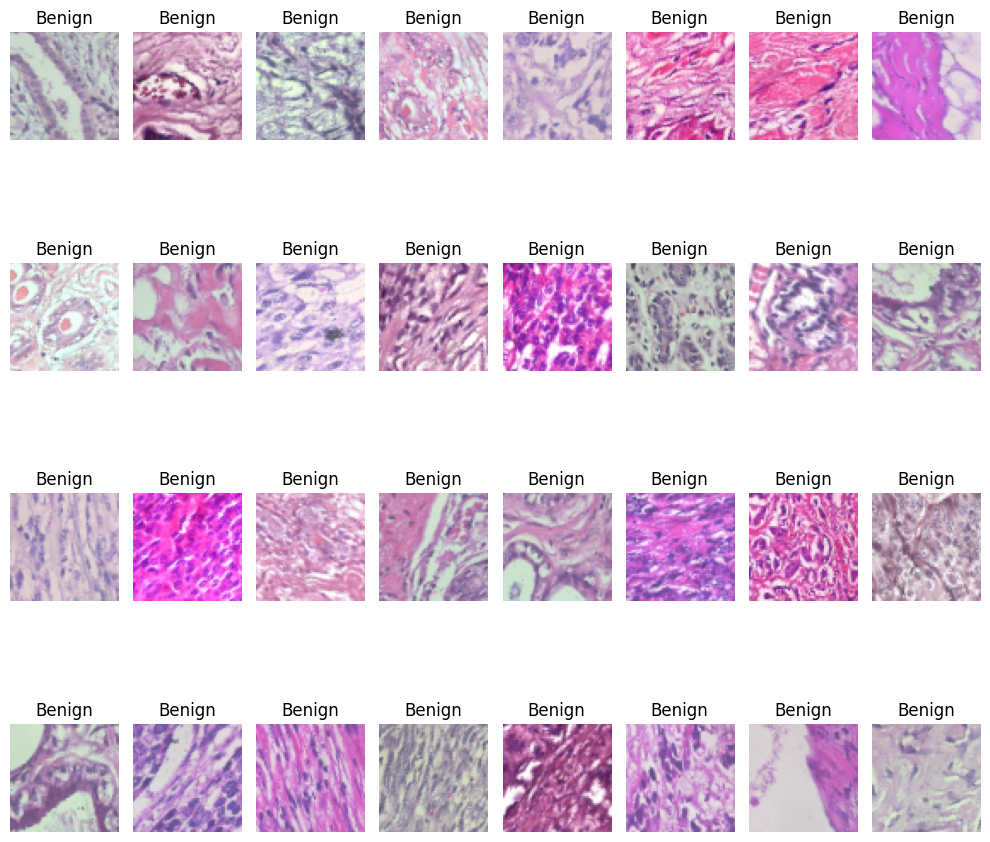

In [20]:
#Checking Training Images
for i, (images, labels) in enumerate(train_dataset):
    if i == 0:
        plt.figure(figsize = (10, 10))
        for p in range(len(images)):
            plt.subplot(4, 8, p+1)
            plt.imshow(images[p].numpy())
            plt.axis('off')
            if np.array_equal(labels[i].numpy(), np.array([1, 0])):
                plt.title("Benign")
            else:
                plt.title("Malignant")
        plt.tight_layout()
        plt.show()

## Part 3 - Building the CNN

### Convolution and Neural Network

In [22]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

### Compile The CNN

In [23]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3936384   
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3937538 (15.02 MB)
Trainable params: 3937538 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

## Part 4 - Training the CNN

### Training Model on Training Set and Evaluating on the Validation Set

In [24]:
cnn.fit(x = train_dataset, validation_data = validation_dataset, epochs = 25)

Epoch 1/25
29/29 [==============================] - 10s 298ms/step - loss: 1.1971 - accuracy: 0.6311 - val_loss: 0.3894 - val_accuracy: 0.8865
Epoch 2/25
29/29 [==============================] - 5s 158ms/step - loss: 0.4759 - accuracy: 0.8194 - val_loss: 0.3983 - val_accuracy: 0.8472
Epoch 3/25
29/29 [==============================] - 5s 156ms/step - loss: 0.4734 - accuracy: 0.8085 - val_loss: 0.3885 - val_accuracy: 0.8603
Epoch 4/25
29/29 [==============================] - 5s 155ms/step - loss: 0.4739 - accuracy: 0.8041 - val_loss: 0.3768 - val_accuracy: 0.8690
Epoch 5/25
29/29 [==============================] - 5s 159ms/step - loss: 0.4536 - accuracy: 0.8226 - val_loss: 0.3457 - val_accuracy: 0.8821
Epoch 6/25
29/29 [==============================] - 5s 155ms/step - loss: 0.4306 - accuracy: 0.8400 - val_loss: 0.3421 - val_accuracy: 0.8734
Epoch 7/25
29/29 [==============================] - 5s 163ms/step - loss: 0.4334 - accuracy: 0.8270 - val_loss: 0.3892 - val_accuracy: 0.8297
Epoch

## Part 5 - Evaluating The Model

### Whole Test Set

In [25]:
PredictProb = cnn.predict(test_dataset)
print(PredictProb)

#Setting Threshold
PredictClass = (PredictProb >= 0.5).astype(int)
print(PredictClass)

28/28 [==============================] - 8s 261ms/step
[[0.89022356 0.10977636]
 [0.8802735  0.11972645]
 [0.8371453  0.16285466]
 ...
 [0.02525581 0.97474426]
 [0.2707007  0.7292993 ]
 [0.04421107 0.95578897]]
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


### Whole Test Set: Confusion Matrix and Accuracy Score

In [27]:
#Pulling True Class Labels From Test set
TrueClass = np.empty((0, 2))
for images, labels in test_dataset:
    nlab = labels.numpy().astype(int)
    TrueClass = np.concatenate((TrueClass, nlab), axis=0)

#Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_True = np.argmax(TrueClass, axis= 1)  
cm_Predict = np.argmax(PredictClass, axis = 1)

print(confusion_matrix(cm_True, cm_Predict))
print(accuracy_score(cm_True, cm_Predict))

[[127  49]
 [ 38 333]]
0.8409506398537477


### Single Image Prediction

1/1 [==============================] - 0s 32ms/step
Prediction: Malignant


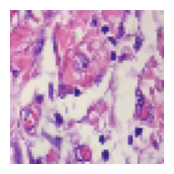

In [32]:
#Load and Rescale Image
test_image = tf.keras.utils.load_img('P:/Portfolio Sets/CNN Breast Tumors/BreaKHis 400X/test/malignant/SOB_M_DC-14-10926-400-005.png', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image /= 255

#Plot Image
plt.figure(figsize = (2, 2))
plt.axis('off')
plt.imshow(test_image)

#Model Prediction
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result = (result >= 0.5).astype(int)
if np.all(result == np.array([1, 0])):
    print('Prediction: Benign')
elif np.all(result == np.array([0, 1])):
    print('Prediction: Malignant')
else:
    print('Error')